In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("spotify.csv")
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [4]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [5]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


In [10]:
#Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?
if df.isnull().sum().sum() > 0:
    df.fillna(df.median(numeric_only=True), inplace=True)  
    df.fillna(df.mode().iloc[0], inplace=True)  
    
duplicates = df.duplicated().sum()
if duplicates > 0:
    df.drop_duplicates(inplace=True)

df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


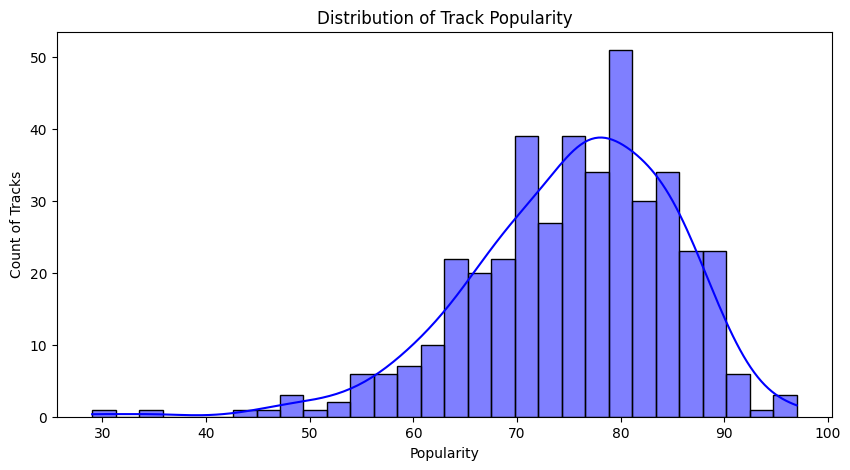

In [12]:
#Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["Popularity"], bins=30, kde=True, color='blue')
plt.xlabel("Popularity")
plt.ylabel("Count of Tracks")
plt.title("Distribution of Track Popularity")
plt.show()

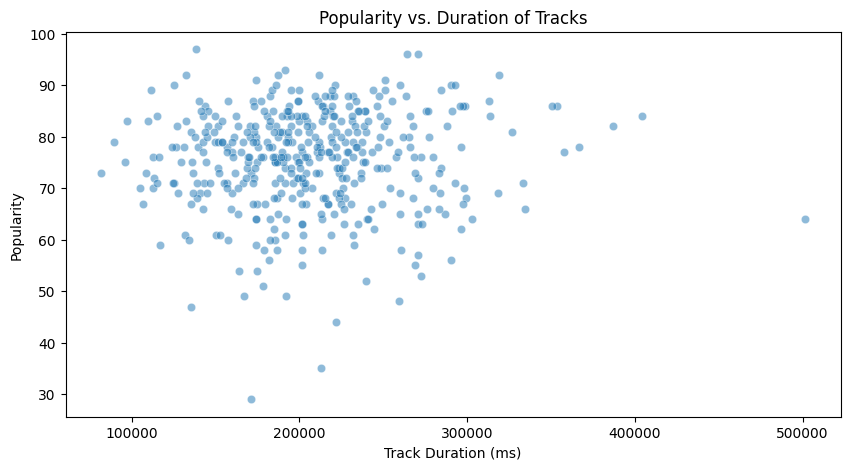

In [15]:
#Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot? 
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Duration (ms)"], y=df["Popularity"], alpha=0.5)
plt.xlabel("Track Duration (ms)")
plt.ylabel("Popularity")
plt.title("Popularity vs. Duration of Tracks")
plt.show()

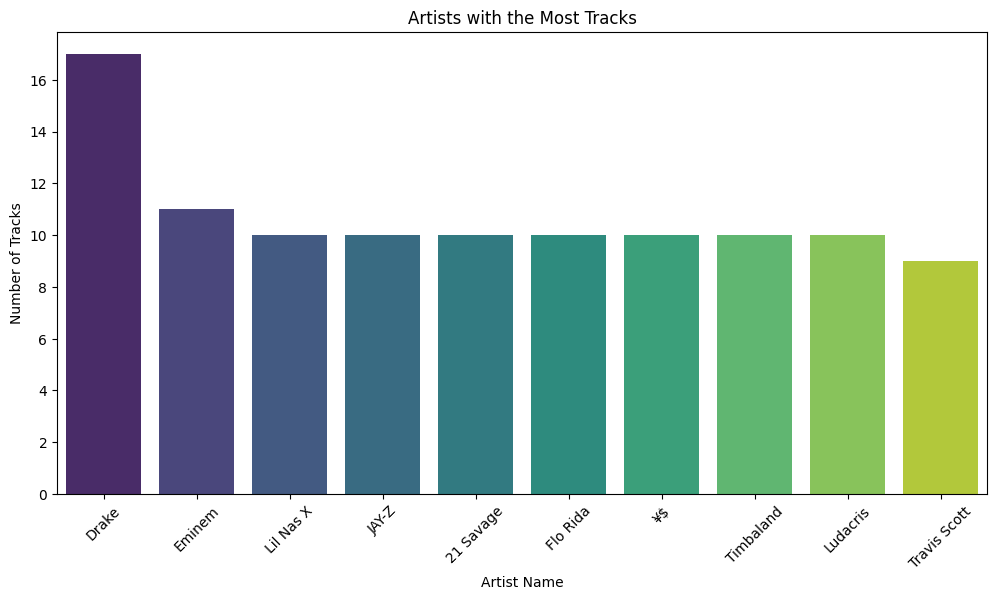

In [17]:
#Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot? 
plt.figure(figsize=(12, 6))
top_artists = df["Artist"].value_counts().head(10)  
sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Artist Name")
plt.ylabel("Number of Tracks")
plt.title("Artists with the Most Tracks")
plt.show()

In [19]:
#Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
least_popular_tracks = df.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print(least_popular_tracks)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [21]:
#Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
avg_popularity = df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False)
top_5_artists = avg_popularity.head(5)
print(top_5_artists)

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [23]:
#Q7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
popular_tracks = df[df["Artist"].isin(top_5_artists.index)].sort_values(["Artist", "Popularity"], ascending=[True, False])
top_tracks = popular_tracks.groupby("Artist").first()[["Track Name", "Popularity"]]
print(top_tracks)

                                Track Name  Popularity
Artist                                                
David Guetta            Baby Don't Hurt Me          87
Travis Scott    FE!N (feat. Playboi Carti)          93
Trueno        Mamichula - con Nicki Nicole          89
cassö                                Prada          92
¥$                                CARNIVAL          96


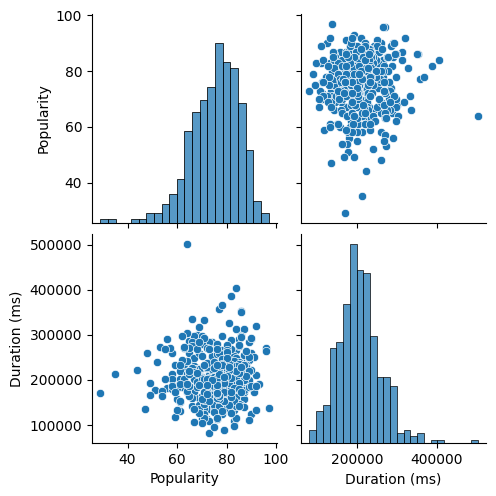

In [26]:
#Q8. isualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(df[["Popularity", "Duration (ms)"]])
plt.show()

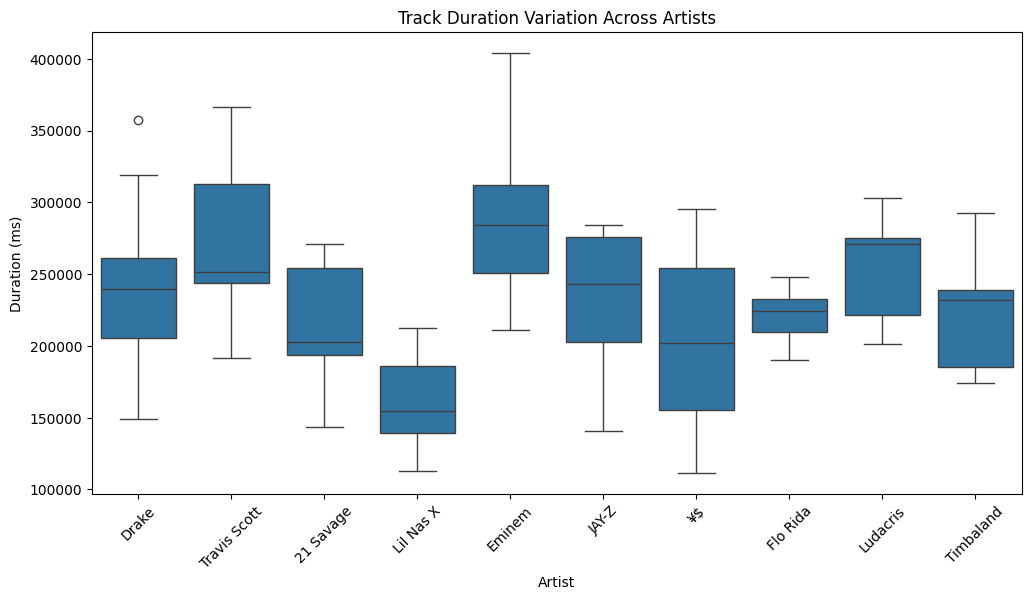

In [28]:
#Q9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
top_10_artists = df["Artist"].value_counts().head(10).index
filtered_df = df[df["Artist"].isin(top_10_artists)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="Artist", y="Duration (ms)", data=filtered_df)
plt.xticks(rotation=45)
plt.title("Track Duration Variation Across Artists")
plt.show()


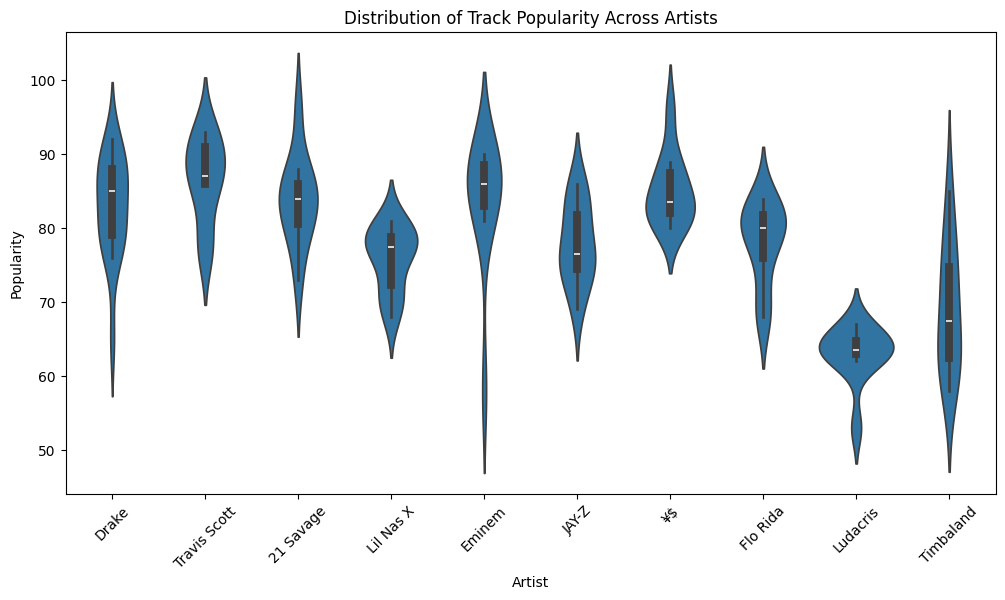

In [29]:
#Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=filtered_df)
plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity Across Artists")
plt.show()